### Question 7

In [2]:
# !pip install ucimlrepo
# !pip install cvxpy
# !pip install clarabel


In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [4]:
# !! DO NOT MODIFY THIS CELL !!

# Download and preprocess the dataset.
# fetch dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
# Convert categorical features into one-hot encode
categorical_features = ['cp','thal','slope','restecg']
X = pd.get_dummies(X, columns=categorical_features)

y = heart_disease.data.targets
print(f"Number of samples in all full dataset is: {len(X)}.")

# Check if our train set has missing value
na_in_features = X.isna().any(axis=1).sum()
na_in_trainY = y.isna().sum()
print(f"Number of rows with missing values in features: {na_in_features}")

# Drop the rows with missing values.
indices_with_nan = X.index[X.isna().any(axis=1)]
X = X.drop(indices_with_nan)
y = y.drop(indices_with_nan)

# Divide train/test
np.random.seed(6464)
msk = np.random.rand(len(X)) < 0.75
X_train = X[msk]
X_test = X[~msk]
y_train = y[msk]
y_test = y[~msk]

# Convert problem to binary problem
X_train = np.array(X_train,dtype='float')
X_test = np.array(X_test,dtype='float')
y_train = np.array([-1 if i==0 else 1 for i in y_train.values],dtype='float')
y_test = np.array([-1 if i==0 else 1 for i in y_test.values],dtype='float')

print(f"Shapes: X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

Number of samples in all full dataset is: 303.
Number of rows with missing values in features: 4
Shapes: X_train: (216, 22), y_train: (216,), X_test: (83, 22), y_test: (83,)


### Question 7.1 - Normalization of X_train and X_test

### 7.1.1 - Implementing data normalization

In [ ]:
# Normalize X_train and X_test using the statistics of X_train.
# 1. Compute the mean and standard deviation for each feature in X_train
# 2. Subtract the mean from each feature and divide by the standard deviation
#    for both X_train and X_test.

#YOUR CODE HERE!
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train_normalized = (X_train - mean) / std
X_test_normalized = (X_test - mean) / std

s1 = X_train_normalized.shape == X_train.shape
s2 = X_test_normalized.shape == X_test.shape

print("X_train shape assertion:", s1)
print("X_test shape assertion:", s2)


X_train shape assertion: True
X_test shape assertion: True


### 7.1.2 - Why normalize with mean and standard deviation?
The mean and standard deviation are computed from the training data because the test set is meant to simulate unseen data and should not influence the preprocessing step. Using statistics from the training data ensures that the model generalizes well, preventing data leakage and making the test data truly representative of real-world scenarios.

In [6]:
# Print the mean and standard deviation of the first and last feature.

# YOUR CODE HERE!
print(f"Mean of first feature: {mean[0]}")
print(f"Standard deviation of first feature: {std[0]}")
print(f"Mean of last feature: {mean[-1]}")
print(f"Standard deviation of  last feature: {std[-1]}")

Mean of first feature: 54.99074074074074
Standard deviation of first feature: 9.077847854724455
Mean of last feature: 0.5046296296296297
Standard deviation of  last feature: 0.49997856607007907


### Q 7.1.3
The mean and standard deviation of the first feature are 54.99 and 9.08, while for the last feature, they are 0.5046 and 0.49998, respectively. These values are computed from the training data to ensure consistent normalization for both training and test datasets, preventing data leakage.

In [7]:
# Train SVM

# Complete the `trainSVM` function to find the optimal w and b that minimize
# the primal SVM objective given in the write-up.
# The function takes three inputs:
# - trainX: the normalized train features with shape (#train_samples, #features)
# - trainY: train labels with shape (#train_samples,)
# - C: C parameter of the minimization problem
# The function should return a three-tuple with:
# - w: the weight vector with shape (#features,)
# - b: the bias. A scalar with shape (1,)
# - xi: the slack variables with shape (#train_samples,)

# You can use cvxpy that we imported as cp
# You may find cp.Variable, cp.Minimize, cp.Problem useful
# For the problem solver, prefer the default, cp.CLARABEL

def trainSVM(trainX, trainY, C):

    # YOUR CODE HERE!
    n, m = trainX.shape
    w = cp.Variable(m)
    b = cp.Variable()
    xi = cp.Variable(n)

    # loss = cp.sum(cp.pos(1 - cp.multiply(trainY, trainX @ w + b)) + C * xi)
    # objective = cp.Minimize(loss)
    objective = cp.Minimize(0.5 * cp.sum_squares(w) + C * cp.sum(xi))
    # constraints = [xi >= 0]
    constraints = [cp.multiply(trainY, trainX @ w + b) >= 1 - xi, xi >= 0]
    prob = cp.Problem(objective, constraints)
    prob.solve(solver = cp.CLARABEL)

    return w.value, b.value, xi.value

    

### 7.2 SVM Training

### 7.2.1 - Implemeting trainSVM

In [8]:
# Solve SVM with C = 1 and print the first three weights, b and the first
# three slack variables as instructed in the write-up

# YOUR CODE HERE!
w, b, xi = trainSVM(X_train_normalized, y_train, 1)
print(f"First three weights: {w[:3]}")
print(f"Bias: {b}")
print(f"First three slack variables: {xi[:3]}")

w_1 = w
b_1 = b
xi_1 = xi

First three weights: [-0.01280085  0.51706872  0.27813637]
Bias: 0.08109278680708337
First three slack variables: [-1.08487196e-10 -1.07320090e-10 -1.09846811e-10]


In [9]:
# Solve SVM with C = 0 and print the first three weights, b and the first
# three slack variables as instructed in the write-up

# YOUR CODE HERE!
w, b, xi = trainSVM(X_train_normalized, y_train, 0)
print(f"First three weights: {w[:3]}")
print(f"Bias: {b}")
print(f"First three slack variables: {xi[:3]}")

First three weights: [3.90035347e-11 2.92283697e-11 1.90604453e-11]
Bias: -13.492472743509481
First three slack variables: [504.1019176  497.5850476  495.44091299]


### 7.2.2 
For C = 1, the first three weights are [-0.0128, 0.5171, 0.2781], the bias is 0.0811, and the first three slack variables are nearly zero, indicating a well-regularized model. For C = 0, the weights are extremely small, the bias is -13.4925, and the high slack variables (over 495) show that many points violate the margin constraints, leading to poor classification.

### 7.2.3 - Difference between the slack variables with C = 0 and C = 1?

Yes, there is a significant difference. When $C = 1$, the slack variables are nearly zero, meaning most points are correctly classified with minimal margin violations, while for $C = 0$, the slack variables are large, indicating that the model is allowing many misclassifications.  

This explains why we introduce the $C \sum \xi_i$ term in Soft-SVM, it penalizes misclassification, ensuring a balance between maximizing the margin and minimizing classification errors.



### 7.3 SVM Evaluation

### 7.3.1 - evalSVM implementation

In [10]:
# Eval SVM

# Write a function to evaluate the SVM model given its `w` and `b` parameters
# on evaluation data `X_eval` and true labels `y_eval`.
#  1. Estimate the labels of `X_eval`.
#  2. Return the ratio of accurately estimated labels by comparing with `y_eval`.


def evalSVM(X_eval, y_eval, w, b):

    # YOUR CODE HERE!
    y_pred = np.sign(X_eval @ w + b)
    accuracy = np.mean(y_pred == y_eval)
    return accuracy


# evalSVM(X_test_normalized, y_test, w_1, b_1)

In [11]:
train_accuracies = []
test_accuracies = []
c_values = [a * 10 ** q for a in [1,3,6] for q in [-4, -3, -2, -1, 0, 1]]
c_values = sorted(c_values)

print(c_values)

# c_values
# For each C value given in the homework, find optimal w, b
# values using the normalized train set. calculate the accuracy
# on train and test sets using found w and b.
# Save those values as we will plot them

# YOUR CODE HERE!
for c in c_values:
    w, b, _ = trainSVM(X_train_normalized, y_train, c)
    train_accuracies.append(evalSVM(X_train_normalized, y_train, w, b))
    test_accuracies.append(evalSVM(X_test_normalized, y_test, w, b))

print(test_accuracies)

check_val_train = zip(c_values, train_accuracies)
for val in check_val_train:
    if val[1] == max(train_accuracies):
        print(f"Best C value for train set: {val[0]}, accuracy: {val[1]}")
        break

check_val_test = zip(c_values, test_accuracies)
for val in check_val_test:
    if val[1] == max(test_accuracies):
        print(f"Best C value for test set: {val[0]}, accuracy: {val[1]}")
        break


[0.0001, 0.00030000000000000003, 0.0006000000000000001, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.30000000000000004, 0.6000000000000001, 1, 3, 6, 10, 30, 60]
[0.6144578313253012, 0.6144578313253012, 0.7590361445783133, 0.8433734939759037, 0.8554216867469879, 0.8433734939759037, 0.8433734939759037, 0.8433734939759037, 0.8433734939759037, 0.8433734939759037, 0.8433734939759037, 0.8313253012048193, 0.8313253012048193, 0.8192771084337349, 0.8192771084337349, 0.8072289156626506, 0.8072289156626506, 0.7951807228915663]
Best C value for train set: 10, accuracy: 0.8888888888888888
Best C value for test set: 0.003, accuracy: 0.8554216867469879


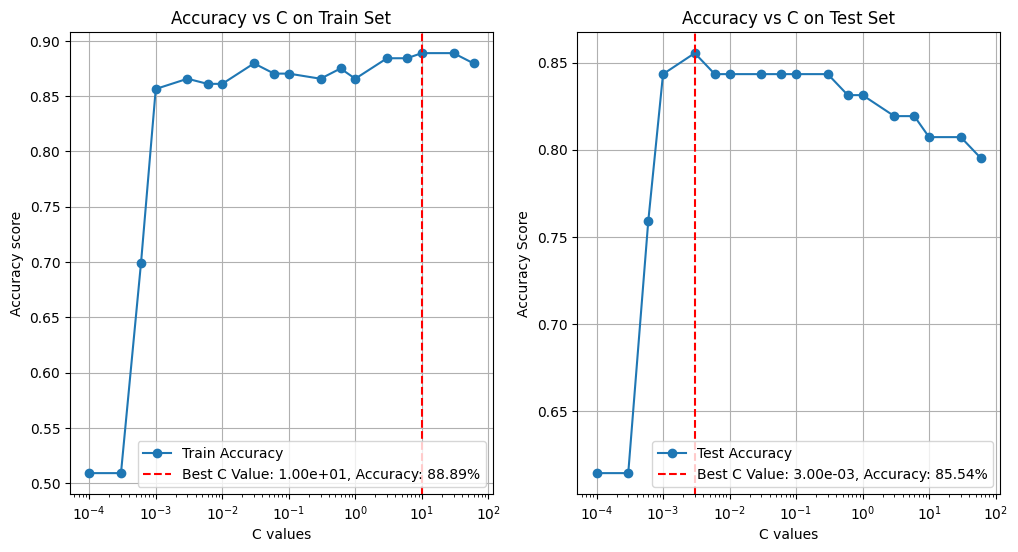

In [12]:
# Plotting and reporting the desired values

# sort the values of c
c_values_sorted = sorted(c_values)
train_accuracies_sorted = [train_accuracies[i] for i in np.argsort(c_values)]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(c_values_sorted, train_accuracies_sorted, label='Train Accuracy', marker='o')  
# ax[0].axvline(x= c_values_sorted[np.argmax(train_accuracies)], color='r', linestyle='--', label='Best C Value: {:.2e}'.format(c_values_sorted[np.argmax(train_accuracies)]))
ax[0].axvline(x=c_values_sorted[np.argmax(train_accuracies)], color='r', linestyle='--',
              label='Best C Value: {:.2e}, Accuracy: {:.2f}%'.format(
                  c_values_sorted[np.argmax(train_accuracies)], 
                  train_accuracies[np.argmax(train_accuracies)] * 100))  # Convert to percentage
# ax[0].plot(c_values, train_accuracies)
ax[0].set_xscale('log')
ax[0].set_xlabel('C values')
ax[0].set_ylabel('Accuracy score')
ax[0].legend()
ax[0].grid()    
ax[0].set_title('Accuracy vs C on Train Set')

test_accuracies_sorted = [test_accuracies[i] for i in np.argsort(c_values)]
ax[1].plot(c_values, test_accuracies, label='Test Accuracy', marker='o')
# ax[1].axvline(x= c_values_sorted[np.argmax(test_accuracies)], color='r', linestyle='--', label='Best C Value: {:.2e}'.format(c_values_sorted[np.argmax(test_accuracies)]))
ax[1].axvline(x=c_values_sorted[np.argmax(test_accuracies)], color='r', linestyle='--',
              label='Best C Value: {:.2e}, Accuracy: {:.2f}%'.format(
                  c_values_sorted[np.argmax(test_accuracies)], 
                  test_accuracies[np.argmax(test_accuracies)] * 100))  # Convert to percentage
ax[1].set_xscale('log')
ax[1].set_xlabel('C values')
ax[1].set_ylabel('Accuracy Score')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Accuracy vs C on Test Set')

plt.show()


### SVM Evaluation

On the train data, the C value of $10$ achieved the best accuracy of $88.9\%$ while the best C value on the test data is $0.003$ with an accuracy of $85.5\%$